In [1]:
import pandas as pd 

data_main=pd.read_excel("/Users/withmocha/Desktop/TEED/세미나/23.11.21/data/data_norm.xlsx")

data_main


data=pd.read_excel("/Users/withmocha/Desktop/TEED/세미나/23.11.21/data/data_drop.xlsx")

In [2]:
data_main

,Unnamed: 0,FORCE_B(Right),"FORCE_C(Left),",FSR DATA_B(Right),FSR DATA_C(Left)
0,0,0.705263,0.706522,0.772727,0.68
1,1,0.715789,0.714674,0.727273,0.66
2,2,0.747368,0.747283,0.727273,0.64
3,3,0.768421,0.709239,0.681818,0.58
4,4,0.842105,0.684783,0.681818,0.56
...,...,...,...,...,...
608,608,0.505263,0.929348,0.363636,0.62
609,609,0.242105,0.910326,0.409091,0.64
610,610,0.473684,0.918478,0.500000,0.62
611,611,0.400000,0.891304,0.636364,0.56


In [3]:
data

,Unnamed: 0,FORCE_B(Right),"FORCE_C(Left),",FSR DATA_B(Right),FSR DATA_C(Left)
0,0,0.705263,0.706522,0.772727,0.68
1,1,0.715789,0.714674,0.727273,0.66
2,2,0.747368,0.747283,0.727273,0.64
3,3,0.768421,0.709239,0.681818,0.58
4,4,NaN,NaN,NaN,NaN
...,...,...,...,...,...
608,608,0.505263,0.929348,0.363636,0.62
609,609,0.242105,0.910326,0.409091,0.64
610,610,0.473684,0.918478,0.500000,0.62
611,611,0.400000,0.891304,0.636364,0.56


In [4]:
data_main.drop(columns=['Unnamed: 0'],inplace=True)
data.drop(columns=['Unnamed: 0'],inplace=True)

<Axes: >

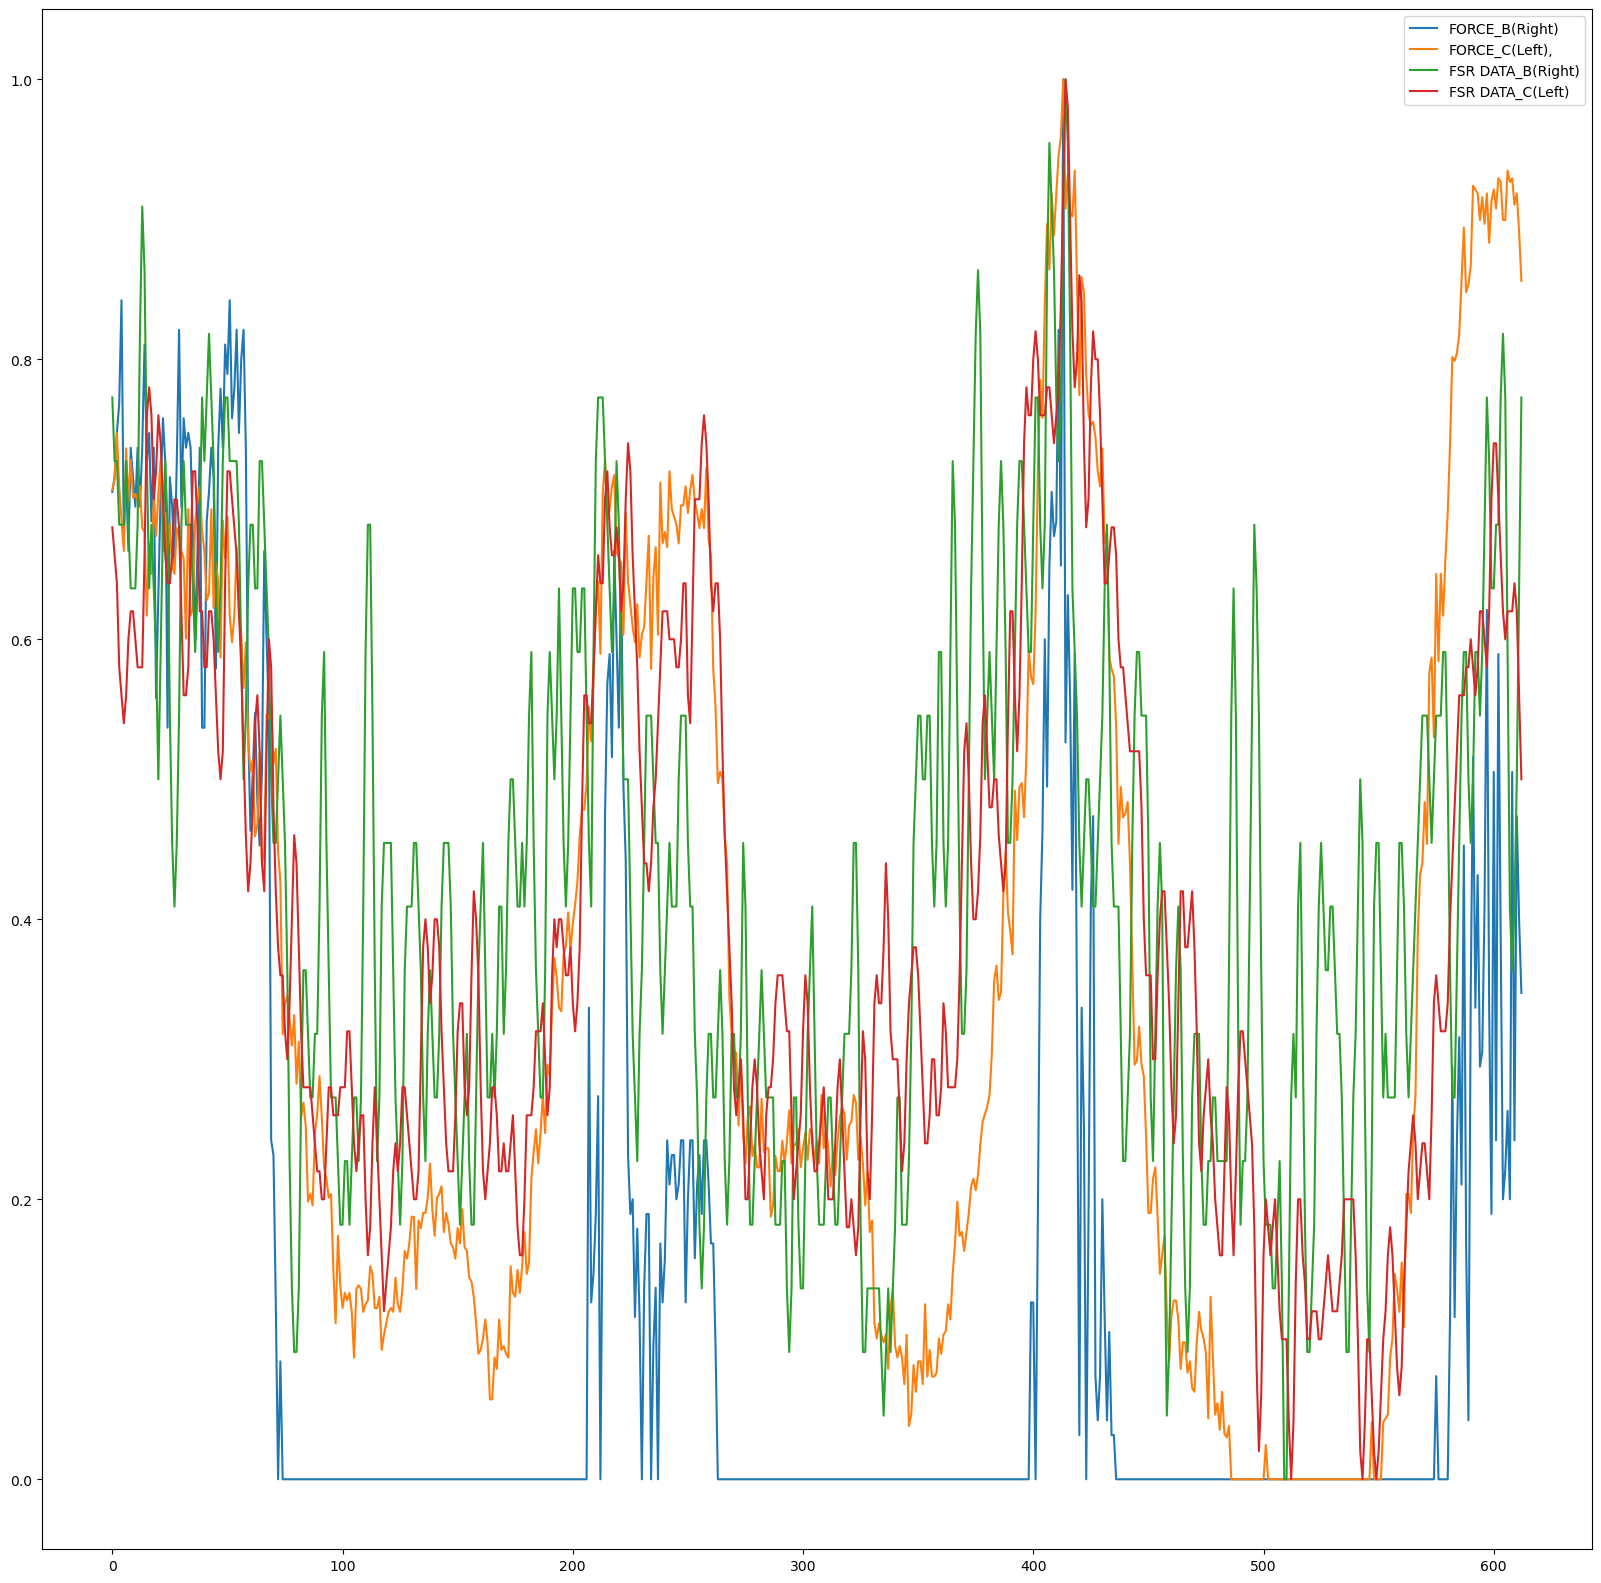

In [5]:
data_main.plot(figsize=(20,20))

<Axes: >

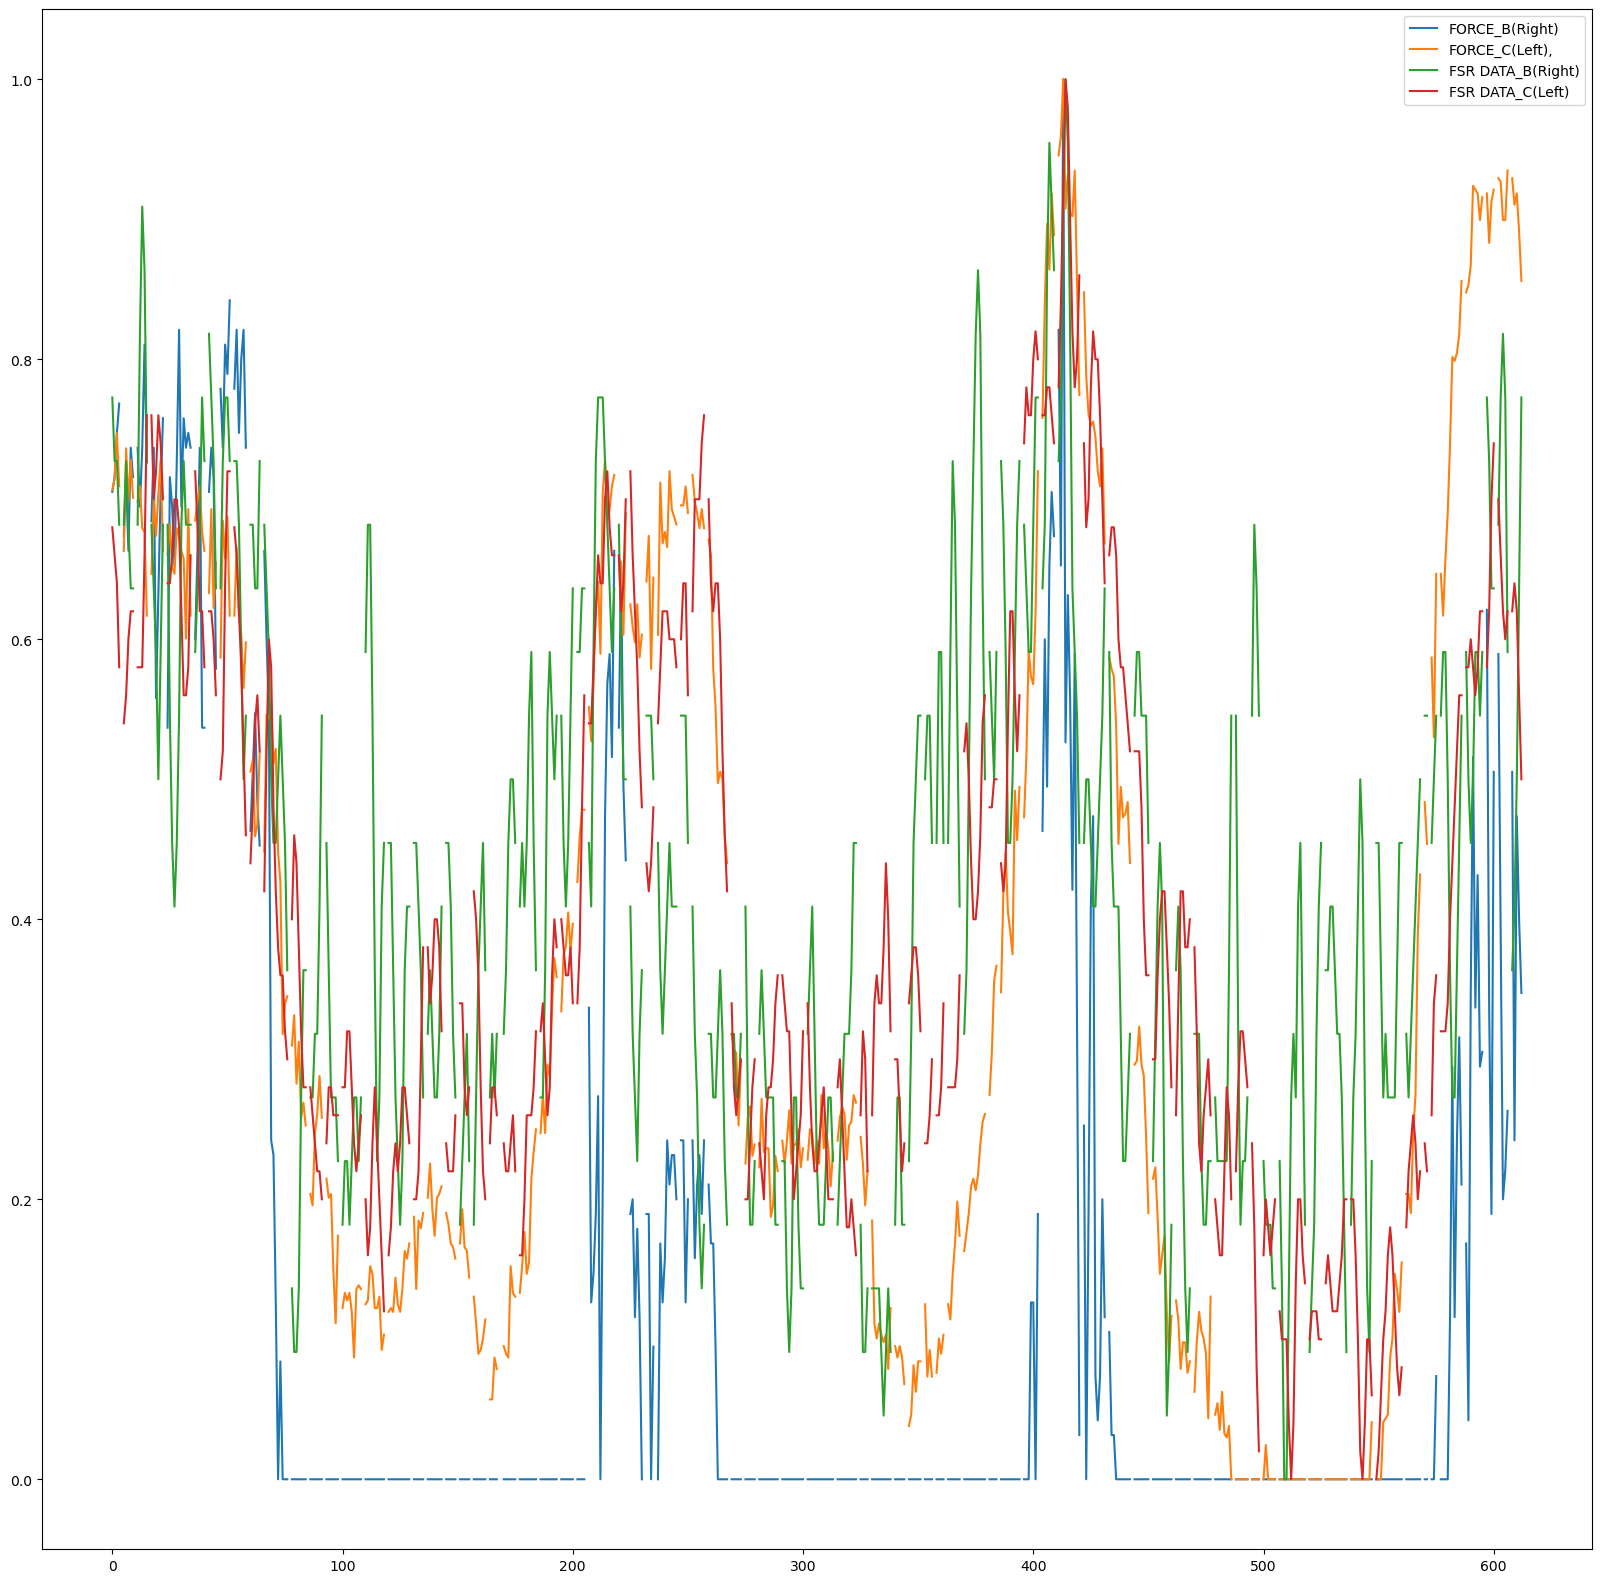

In [6]:
data.plot(figsize=(20,20))

In [7]:
print(data.isnull().sum())
print(data_main.isnull().sum())

FORCE_B(Right)       78
FORCE_C(Left),       78
FSR DATA_B(Right)    78
FSR DATA_C(Left)     78
dtype: int64
FORCE_B(Right)       0
FORCE_C(Left),       0
FSR DATA_B(Right)    0
FSR DATA_C(Left)     0
dtype: int64


FORCE_B(Right)


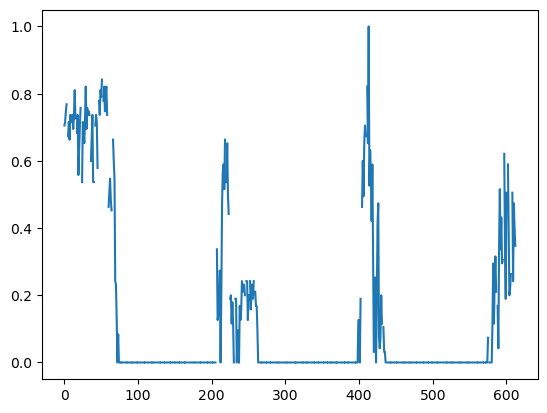

FORCE_C(Left),


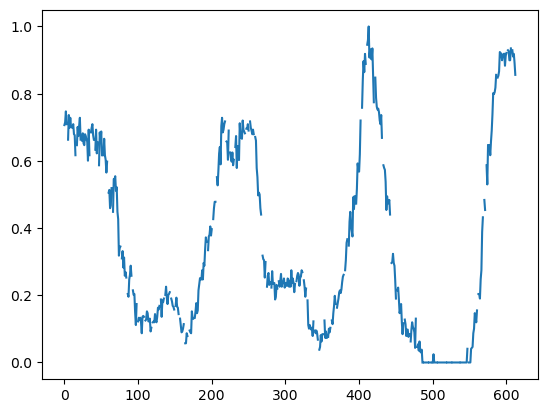

FSR DATA_B(Right)


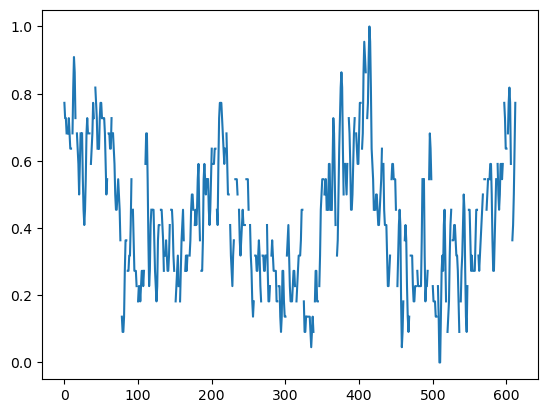

FSR DATA_C(Left)


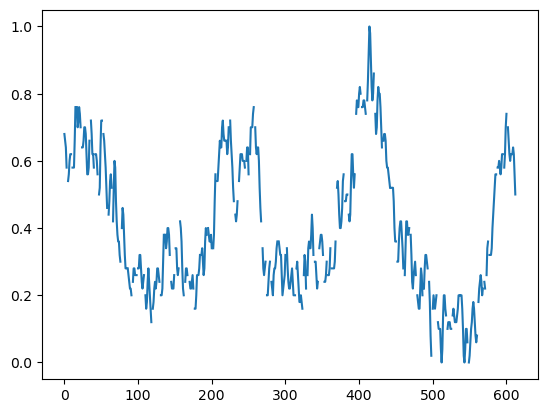

In [8]:
import matplotlib.pyplot as plt

columns=data.columns
count=0
for i in columns:
    print(columns[count])
    count=count+1
    plt.plot(data[i])
    plt.show()
    

In [9]:
## R_FORCE_B : L_FORCE_C
## R_FORCE_B : L_FSR_C : 

In [10]:
data_sca=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.11.03/data_norm.xlsx")
data_sca.drop(columns=["Unnamed: 0","FORCE_B(Right)","FSR DATA_B(Right)"],inplace=True)




In [11]:
data_sca.columns

Index(['FORCE_C(Left),', 'FSR DATA_C(Left)'], dtype='object')

In [12]:
from sklearn.preprocessing import MinMaxScaler

data2=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.11.03/data_target.xlsx")

R2=data2.loc[:,['FORCE_B(Right)','FSR DATA_B(Right)']]

scaler=MinMaxScaler()
R_scaled=scaler.fit_transform(R2)

R3=pd.DataFrame(data=R_scaled)

R_new=R3.set_axis(["FORCE_B(Right)","FSR DATA_B(Right)"],axis="columns")

R=data.loc[:,['FORCE_B(Right)','FSR DATA_B(Right)']]
L=data.loc[:,['FORCE_C(Left),','FSR DATA_C(Left)']]


In [13]:
data.columns

Index(['FORCE_B(Right)', 'FORCE_C(Left),', 'FSR DATA_B(Right)',
       'FSR DATA_C(Left)'],
      dtype='object')

In [14]:
R=data.loc[:,['FORCE_B(Right)','FSR DATA_B(Right)']]
L=data.loc[:,['FORCE_C(Left),','FSR DATA_C(Left)']]

<Axes: >

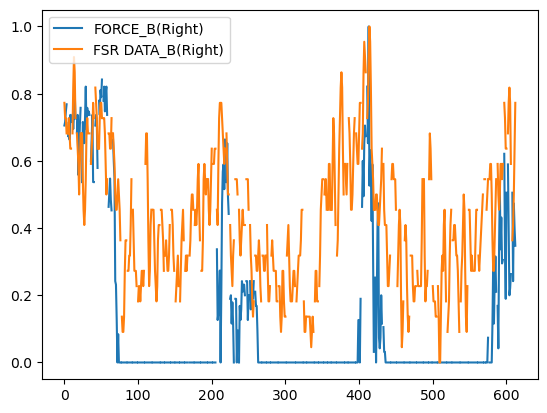

In [15]:
R.plot()

<Axes: >

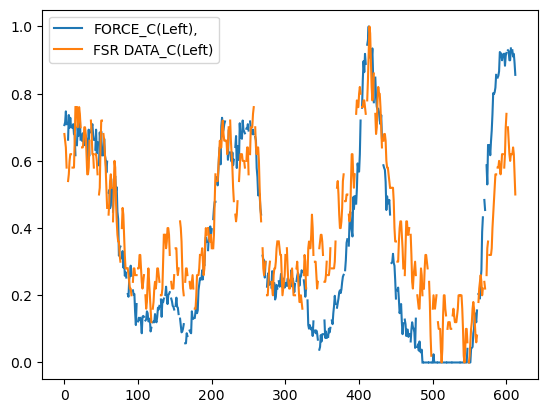

In [16]:
L.plot()

In [17]:
import numpy as np

index=R.index

loss_index_R_FORECE_B=np.array(R.index).reshape(-1,1)[R.iloc[:,0].isna()]
loss_index_R_FSR_B=np.array(R.index).reshape(-1,1)[R.iloc[:,1].isna()]

normal_index_R_FORECE_B=np.setdiff1d(index,loss_index_R_FORECE_B)
normal_index_R_FSR_B=np.setdiff1d(index,loss_index_R_FSR_B)

In [18]:
index=L.index

loss_index_L_FORECE_C=np.array(L.index).reshape(-1,1)[L.iloc[:,0].isna()]
loss_index_L_FSR_C=np.array(L.index).reshape(-1,1)[L.iloc[:,1].isna()]

normal_index_L_FORECE_C=np.setdiff1d(index,loss_index_L_FORECE_C)
normal_index_L_FSR_C=np.setdiff1d(index,loss_index_L_FSR_C)

In [19]:
## R_FORCE_B : L_FORCE_C
##  R_FORCE_B : L_FSR_C 

In [20]:
x_train_R_FORECE_B=normal_index_R_FORECE_B.reshape(-1,1)
y_train_L_FORECE_C=L.iloc[normal_index_L_FORECE_C,0]
x_test_L_FORECE_C=loss_index_L_FORECE_C

y_train_L_FSR_C=L.iloc[normal_index_L_FORECE_C,1]
x_test_L_FSR_C=loss_index_L_FSR_C

L_FORCE_C=L.iloc[:,0].copy()
L_FSR_C=L.iloc[:,1].copy()

In [21]:
print(x_train_R_FORECE_B.shape)
print(y_train_L_FORECE_C.shape)

(535, 1)
(535,)


In [22]:
x_train_R_FORECE_B=x_train_R_FORECE_B.reshape(x_train_R_FORECE_B.shape[0],x_train_R_FORECE_B.shape[1],1)
x_test_L_FORECE_C=x_test_L_FORECE_C.reshape(x_test_L_FORECE_C.shape[0],x_test_L_FORECE_C.shape[1],1)
x_test_L_FSR_C=x_test_L_FSR_C.reshape(x_test_L_FSR_C.shape[0],x_test_L_FSR_C.shape[1],1)

In [23]:
print(x_train_R_FORECE_B.shape)
print(y_train_L_FORECE_C.shape)

(535, 1, 1)
(535,)


In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM
from tensorflow.keras import layers
from keras.layers import Activation, Dense
import tensorflow as tf 
from tensorflow.keras import Model
from keras.layers import Dropout
from keras.layers import Dense, Input, TimeDistributed, Flatten
from keras.layers.convolutional import Conv1D ,MaxPooling1D
from keras.optimizers import adam
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model_cnn_lstm = Sequential()
model_cnn_lstm.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, x_train_R_FORECE_B.shape[1], x_train_R_FORECE_B.shape[2])))
model_cnn_lstm.add(TimeDistributed(MaxPooling1D(pool_size=1)))
model_cnn_lstm.add(TimeDistributed(Flatten()))
model_cnn_lstm.add(LSTM(100, activation='relu'))
model_cnn_lstm.add(Dense(1))
model_cnn_lstm.compile(loss='mse', optimizer='adam')
model_cnn_lstm.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, None, 1, 64)      128       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, None, 1, 64)      0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, None, 64)         0         
 tributed)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               66000     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                        

In [25]:
import numpy as np
import optuna
from keras.applications import MobileNet
from sklearn.metrics import mean_squared_error





/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [32]:
def objective(trial):
    #hidden_layer_sizes=trial.suggest_int("hidden_layer_sizes",10,500)
    #alpha = trial.suggest_float("alpha",0.00001,0.1)
    batch_size = trial.suggest_int("batch_size",1,100)
    #learning_rate_init = trial.suggest_float("learning_rate_init",0.001,0.1)
    steps_per_epoch=trial.suggest_int("steps_per_epoch",1,10)
    epochs=trial.suggest_int("epochs",1000,4000)
    filter=trial.suggest_int("filter",10,200)
    lstm_par1=trial.suggest_int("lstm_par1",100,500)
    lstm_par2=trial.suggest_int("lstm_par2",100,500)
    #dense_par=trial.suggest_int("dense_par",1,10)
    
    
    model_cnn_lstm = Sequential()
    model_cnn_lstm.add(TimeDistributed(Conv1D(filters=filter, kernel_size=1, activation='relu'), input_shape=(None, x_train_R_FORECE_B.shape[1], x_train_R_FORECE_B.shape[2])))
    model_cnn_lstm.add(TimeDistributed(MaxPooling1D(pool_size=1)))
    model_cnn_lstm.add(TimeDistributed(Flatten()))
    model_cnn_lstm.add(LSTM(lstm_par1, activation='relu',return_sequences=True))
    model_cnn_lstm.add(LSTM(lstm_par2, activation='sigmoid',return_sequences=True))
    model_cnn_lstm.add(Dense(1))
    model_cnn_lstm.compile(loss='mse', optimizer='adam')
    #model_cnn_lstm.summary()        
    
    model_cnn_lstm.fit(x_train_R_FORECE_B,y_train_L_FORECE_C,batch_size=batch_size,epochs=epochs,steps_per_epoch=steps_per_epoch)
    y_pred = model_cnn_lstm.predict(x_test_L_FORECE_C)
    c=0
    for i in loss_index_L_FORECE_C:    
        L_FORCE_C[i]=y_pred[c]
        c+=1
    return mean_squared_error(data_main['FORCE_C(Left),'], L_FORCE_C) ** 0.5

study = optuna.create_study()
study.optimize(objective, n_trials=25)

best_params=study.best_params
print(best_params)
study.best_value

[I 2023-11-13 19:39:19,723] A new study created in memory with name: no-name-6dd165c7-4824-4c71-8027-aab3e4c5adc2
2023-11-13 19:39:19.910911: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/2499
9/9 [==============================] - 1s 8ms/step - loss: 0.2529
Epoch 2/2499
9/9 [==============================] - 0s 8ms/step - loss: 0.0890
Epoch 3/2499
9/9 [==============================] - 0s 7ms/step - loss: 0.0738
Epoch 4/2499
9/9 [==============================] - 0s 7ms/step - loss: 0.0770
Epoch 5/2499
9/9 [==============================] - 0s 6ms/step - loss: 0.0687
Epoch 6/2499
9/9 [==============================] - 0s 7ms/step - loss: 0.0806
Epoch 7/2499
9/9 [==============================] - 0s 7ms/step - loss: 0.0860
Epoch 8/2499
9/9 [==============================] - 0s 7ms/step - loss: 0.0733
Epoch 9/2499
9/9 [==============================] - 0s 7ms/step - loss: 0.0821
Epoch 10/2499
9/9 [==============================] - 0s 6ms/step - loss: 0.0732
Epoch 11/2499
9/9 [==============================] - 0s 7ms/step - loss: 0.0660
Epoch 12/2499
9/9 [==============================] - 0s 7ms/step - loss: 0.0766
Epoch 13/2499
9/9 [==============================

[W 2023-11-13 19:41:43,552] Trial 0 failed with parameters: {'batch_size': 53, 'steps_per_epoch': 9, 'epochs': 2499, 'filter': 63, 'lstm_par1': 350, 'lstm_par2': 445} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "/var/folders/gb/hslcbzfs0bvcnj3zxtfrxt_r0000gn/T/ipykernel_4753/4152682592.py", line 24, in objective
    model_cnn_lstm.fit(x_train_R_FORECE_B,y_train_L_FORECE_C,batch_size=batch_size,epochs=epochs,steps_per_epoch=steps_per_epoch)
  File "/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/keras/engine/training.py", line 1685, i

KeyboardInterrupt: 

In [ ]:
def objective(trial):
    #hidden_layer_sizes=trial.suggest_int("hidden_layer_sizes",10,500)
    #alpha = trial.suggest_float("alpha",0.00001,0.1)
    batch_size = trial.suggest_int("batch_size",1,100)
    #learning_rate_init = trial.suggest_float("learning_rate_init",0.001,0.1)
    steps_per_epoch=trial.suggest_int("steps_per_epoch",1,10)
    epochs=trial.suggest_int("epochs",1000,4000)
    filter=trial.suggest_int("filter",10,200)
    lstm_par1=trial.suggest_int("lstm_par1",100,500)
    lstm_par2=trial.suggest_int("lstm_par2",100,500)
    #dense_par=trial.suggest_int("dense_par",1,10)
    
    
    model_cnn_lstm = Sequential()
    model_cnn_lstm.add(TimeDistributed(Conv1D(filters=filter, kernel_size=1, activation='relu'), input_shape=(None, x_train_R_FORECE_B.shape[1], x_train_R_FORECE_B.shape[2])))
    model_cnn_lstm.add(TimeDistributed(MaxPooling1D(pool_size=1)))
    model_cnn_lstm.add(TimeDistributed(Flatten()))
    model_cnn_lstm.add(LSTM(lstm_par1, activation='relu',return_sequences=True))
    model_cnn_lstm.add(LSTM(lstm_par2, activation='sigmoid',return_sequences=True))
    model_cnn_lstm.add(Dense(1))
    model_cnn_lstm.compile(loss='mse', optimizer='adam')
    #model_cnn_lstm.summary()        
    
    model_cnn_lstm.fit(x_train_R_FORECE_B,y_train_L_FSR_C,batch_size=batch_size,epochs=epochs,steps_per_epoch=steps_per_epoch)
    y_pred = model_cnn_lstm.predict(x_test_L_FSR_C)
    c=0
    for i in loss_index_L_FSR_C:    
        L_FSR_C[i]=y_pred[c]
        c+=1
    return mean_squared_error(data_main['FSR DATA_C(Left)'], L_FSR_C) ** 0.5

study = optuna.create_study()
study.optimize(objective, n_trials=25)

best_params=study.best_params
print(best_params)
study.best_value